<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_LopUsuarioNota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Bibliotecas**

In [0]:
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Lendo o arquivo CSV lopUsuarioNota**

In [0]:
# Ler o arquivo CSV 
lopNotasLista  = pd.read_csv("https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/arquivosCSV/lopUsuarioNota.csv")
lopNotasProva  = pd.read_csv("https://raw.githubusercontent.com/repitta/CienciaDeDadosEducacionais/master/arquivosCSV/lopUsuarioNotaProva.csv")

In [3]:
#Apagando so registros de teste
lopNotasProva = lopNotasProva.drop( lopNotasProva[lopNotasProva.tituloProva.str.contains('teste', regex=False)].index  )
lopNotasProva["tituloProva"].unique()

array(['Prova 02 - Turmas 3A e 3B - 2018.1',
       'Prova 1 - Lab. 2018.2 - T02C', 'Prova 1 - T02 - 2018.2',
       'Prova 1 - Turma 01 - 2017.2', 'Prova 1 - Turma 01A - 2019.1',
       'Prova 1 - Turma 01B - 2019.1', 'Prova 1 - Turma 01C - 2019.1',
       'Prova 1 - Turma 01D - 2019.1', 'Prova 1 - Turma 03 - 2017.2',
       'Prova 1 - Turma 1 AB', 'Prova 1 - Turma 1 CD',
       'Prova 1 - Turma 2A e 2B', 'Prova 1 - Turma 2C e 2D',
       'Prova 1 - Turma 2D - 2018.2', 'Prova 1 - Turma 3A - 2018.2',
       'Prova 1 - Turma 3B - 2018.2', 'Prova 1 - Turma 3C - 2018.2',
       'Prova 1 - Turma 3C e 3D', 'Prova 1 - Turma 3D - 2018.2',
       'Prova 1 - Turmas 3A e 3B', 'Prova 1 AD 2019-1',
       'Prova 1 CD 2019-1', 'Prova 1 Vídeos - Turma 01 - 2017.2',
       'Prova 2 - Lab - Lop - 2018.1 - Rummenigge e Aquiles',
       'Prova 2 - Turma 01 - 2017.2', 'Prova 2 - Turma 03 - 2017.2',
       'Prova 2 - Turma 1 AB', 'Prova 2 - Turma 3A - 2018.2',
       'Prova 2 - Turma 3B - 2018.2', 'Prova 

**Estrutura do aquivo**

In [0]:
print(lopNotasLista.info())
print(lopNotasLista.head())
print(lopNotasProva.info())
print(lopNotasProva.head())


**Pré-processamento**

In [0]:
##Tabela lopNotasLista
#excluir a coluna Unnamed
lopNotasLista = lopNotasLista[['titulo', 'idAluno', 'questoesFeitas', 'quantidade','NotaLista', 'ano', 'descricaoTurma', 'idTurma', 'matricula',"nome"]]
#dividir a coluna NotasLista por 10 , pq elas estão em porcentagem
lopNotasLista["NotaLista"] = lopNotasLista["NotaLista"] /10
#colocar letra maiuscula na coluna nome
lopNotasLista["nome"] = lopNotasLista["nome"].str.upper()

##Tabela lopNotasProva
#lopNotasProva = lopNotasProva.dropna(axis=1, how='all') 
lopNotasProva = lopNotasProva[['tituloProva', 'idAluno', 'questoesFeitasProva', 'quantidadeProva','notaProva', 'ano', 'descricaoTurma', 'idTurma', 'matricula',"nome"]]
#dividir a coluna NotasLista por 10 , pq elas estão em porcentagem
lopNotasProva["notaProva"] = lopNotasProva["notaProva"] /10
#colocar letra maiuscula na coluna nome
lopNotasProva["nome"] = lopNotasProva["nome"].str.upper()

**Funcao para formar a tabela de notas de todas as listas de exercicios**

In [0]:
def tabelaNotasLista(ano,turma):
  colunas    = ["matricula","nome"]
  tabelaListas = pd.DataFrame(columns=colunas)
  listas = ["Exercícios 5", "Exercícios 4.1", "Exercícios 4 - ", "Exercícios 3", "Exercícios 2","Exercícios 1",
            "Laboratório 5","Laboratório 4", "Laboratório 3", "Laboratório 2","Laboratório 1"]
  for l in listas:
    notasTurma = lopNotasLista.loc[(lopNotasLista["ano"] == ano) & (lopNotasLista["descricaoTurma"].str.contains(turma, regex=False)) &
                 (lopNotasLista["titulo"].str.contains(l, regex=False)),["matricula","nome","NotaLista","questoesFeitas"]]
    notasTurma = notasTurma.sort_values("nome")
    tabelaListas = pd.merge(notasTurma,tabelaListas,on=['matricula','nome'], how="outer") 
    
  tabelaListas.columns = ['matricula', 'nome',"lab1","qLab1","lab2","qLab2","lab3","qLab3","lab4","qLab4","lab5","qLab5","exe1","qexe1","exe2","qexe2",
  "exe3","qexe3","exe4","qexe4","exe4.1","qexe4.1","exe5","qexe5"]
  tabelaListas = tabelaListas.drop_duplicates()
  tabelaListas = tabelaListas.sort_values('nome')
  return tabelaListas

**Criar um arquivo excel com as notas das listas por turma**

In [0]:
tabelaLista = tabelaNotasLista(2018.2,"Turma 02A")
#tabelaLista.to_excel(r'tabelaNotas2019Turma02D.xls')
tabelaLista

**Função para formar a tabela das notas de todas as provas**

In [0]:
def tabelaNotasProva(ano,turma):
  colunas    = ["matricula","nome"]
  tabelaProva = pd.DataFrame(columns=colunas)
  provas = ["Prova 2","Prova 1"]
  for l in provas:
    notasTurma = lopNotasProva.loc[(lopNotasProva["ano"] == ano) & (lopNotasProva["descricaoTurma"].str.contains(turma, regex=False)) &
                 (lopNotasProva["tituloProva"].str.contains(l, regex=False)),["matricula","nome","notaProva","questoesFeitasProva"]]
    notasTurma = notasTurma.sort_values("nome")
    tabelaProva = pd.merge(notasTurma,tabelaProva,on=['matricula','nome'], how="outer") 
    
  tabelaProva.columns = ['matricula', 'nome',"pro1","qPro1", "pro2","qPro2"]
  tabelaProva = tabelaProva.drop_duplicates()
  tabelaProva = tabelaProva.sort_values('nome')
  return tabelaProva

**Criar aquivo excel com as notas das provas por turma**

In [0]:
tabelaProva = tabelaNotasProva(2018.2,"Turma 02A")
tabelaProva.to_excel(r'tabelaNotasProva2019Turma01D.xls')
tabelaProva

In [7]:
#criar as tabelas por ano 
print(lopNotasProva["ano"].unique())

[2018.1 2018.2 2017.2 2019.1]


In [8]:
print(lopNotasProva.loc[lopNotasProva["ano"] == 2017.2, "descricaoTurma"].unique() )

['LÓGICA DE PROGRAMAÇÃO - Turma 01A' 'LÓGICA DE PROGRAMAÇÃO - Turma 01B'
 'LÓGICA DE PROGRAMAÇÃO - Turma 01D' 'LÓGICA DE PROGRAMAÇÃO - Turma 01C'
 'LÓGICA DE PROGRAMAÇÃO - Turma 03A' 'LÓGICA DE PROGRAMAÇÃO - Turma 03C'
 'LÓGICA DE PROGRAMAÇÃO - Turma 03B' 'LÓGICA DE PROGRAMAÇÃO - Turma 03D'
 'LÓGICA DE PROGRAMAÇÃO - Turma 02D' 'LÓGICA DE PROGRAMAÇÃO - Turma 02A'
 'LÓGICA DE PROGRAMAÇÃO - Turma 02B' 'LÓGICA DE PROGRAMAÇÃO - Turma 02C']


In [9]:
print(lopNotasProva.loc[lopNotasProva["ano"] == 2017.2, "tituloProva"].unique() )

['Prova 1 - Turma 01 - 2017.2' 'Prova 1 - Turma 03 - 2017.2'
 'Prova 1 Vídeos - Turma 01 - 2017.2' 'Prova 2 - Turma 01 - 2017.2'
 'Prova 2 - Turma 03 - 2017.2' 'Prova 2 Vídeos - Turma 01 - 2017.2'
 'Prova Final' 'Prova Rummenigge - 2ª Unidade'
 'Prova de Reposição - Turma 01 - 2017.2'
 'Questão 2, Prova 1 - Prof. Rummenigge' 'Segunda Prova']


In [0]:
ano = 2017.2
turma = "01B"
lopNotasProva.loc[(lopNotasProva["matricula"] == 20160143251) & (lopNotasProva["ano"] == ano) & (lopNotasProva["descricaoTurma"].str.contains(turma, regex=False)), "tituloProva"].unique()

**Juntar as notas das listas com as notas das provas**

In [0]:
tabelaLista = tabelaNotasLista(2017.2,"Turma 01B")
tabelaProva = tabelaNotasProva(2017.2,"Turma 01B")

mergeNotasListaProva = pd.merge(right = tabelaLista, left = tabelaProva, on=['matricula',"nome"], how="outer")
mergeNotasListaProva = mergeNotasListaProva.sort_values("nome")
mergeNotasListaProva

In [0]:
tabela20172 = mergeNotasListaProva

In [0]:
#Juntar todas as tabelas por ano
tabela20172 = pd.concat([tabela20172, mergeNotasListaProva],  ignore_index=True, sort=False)
tabela20172                         

In [0]:
#Substituir nan por zero
mergeNotasListaProva.replace(np.nan, 0, inplace=True)
mergeNotasListaProva

In [0]:
#Criar a regressao Linear 

#Separando variáveis que vamos utilizar para efetuar a regressão linear
X = mergeNotasListaProva["lab1"]
Y = mergeNotasListaProva["pro1"]

from sklearn.model_selection import train_test_split
#Separando conjuntos de treino e de teste - 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)


from sklearn.linear_model import LinearRegression
#Criando (e treinando) modelo para regressão linear
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), Y_train)

#Usando modelo treinado com o conjunto de treino para prever os valores esperados para o conjunto de teste
resultados = model.predict(X_test.values.reshape(-1, 1))

#Plotando gráfico de valores previstos x valores esperados
plt.scatter(Y_test, resultados)

In [0]:
Y

**Tabela de notas e quantidade de questões feitas por aluno por turma por lista**

In [0]:
notasTurma = lopNotasLista.loc[(lopNotasLista["ano"] == 2019.1) & (lopNotasLista["descricaoTurma"].str.contains("Turma 01A", regex=False)) &
                          (lopNotasLista["titulo"].str.contains("Lista de Exercícios 1", regex=False)),["nome","NotaLista","questoesFeitas"]]
notasTurma = notasTurma.sort_values("nome")
print("Quantidade de alunos que fizeram a lista:", notasTurma.shape[0])
print(notasTurma)


Quantidade de alunos que fizeram a lista: 25
                                   nome  NotaLista  questoesFeitas
559               ALANA DE SOUZA MACIEL   9.333333              15
665                          ANDRÉ LUÍS   4.000000               6
557        CINTHYA LUZIA XAVIER TENORIO   4.666667               7
570         CLAUDIANO LEONARDO DA SILVA   5.333333               9
560   ELZA BEATRIZ HERMÓGENES DE FARIAS   4.500000               7
558      ERICH BRENDELL ARAÚJO MEDEIROS   4.000000               6
572        FELIPE SERGIO SOUSA DA SILVA   3.333333               6
666                     FELLYPE EDUARDO   4.000000               6
226             GABRIEL FERNANDES SILVA   4.666667               7
582        GUILHERME GONÇALVES PALHARES   9.333333              15
564      IAGO ESRON SANTIAGO DE AMRANTE   9.166667              15
550                JOYCE BARBOSA CABRAL   0.666667               1
553       JOÃO VITOR DA CONCEIÇÃO SILVA  10.000000              15
567           KAI

In [0]:
quanListAluno.columns

**Gráfico para mostrar a quantidade de alunos que enviaram as listas ao longo dos anos**

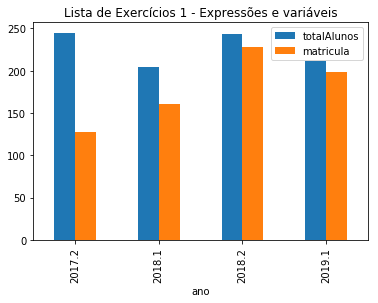

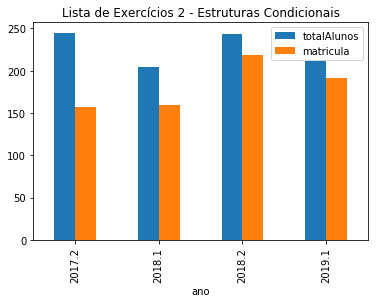

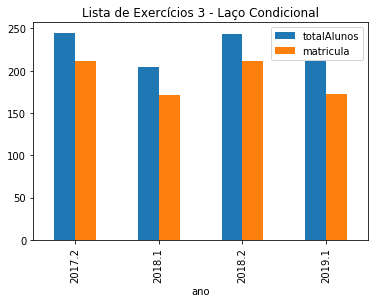

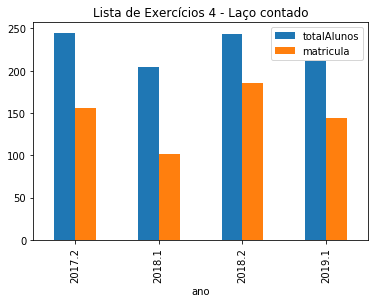

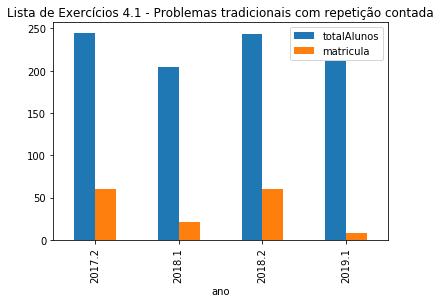

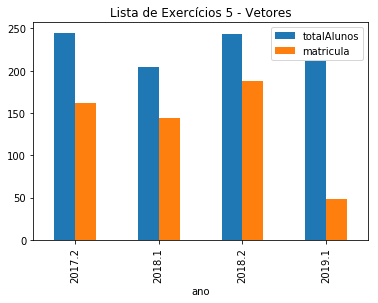

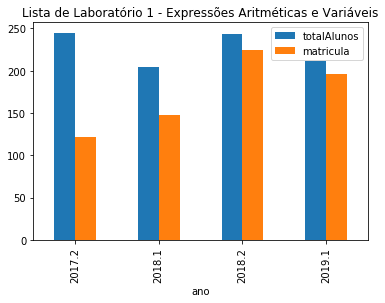

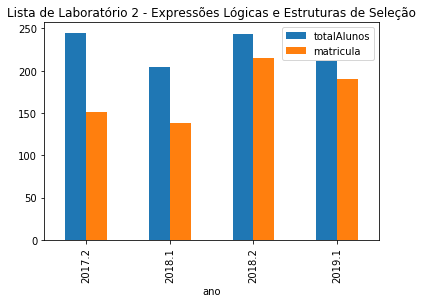

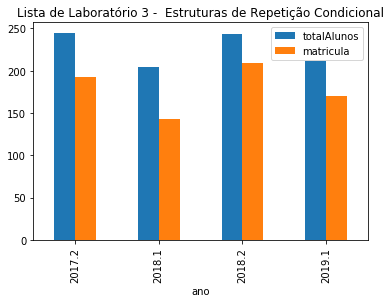

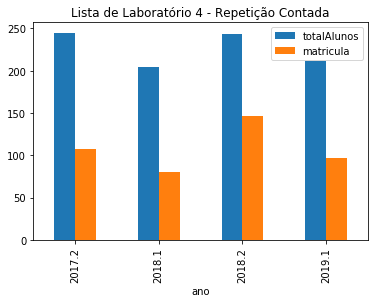

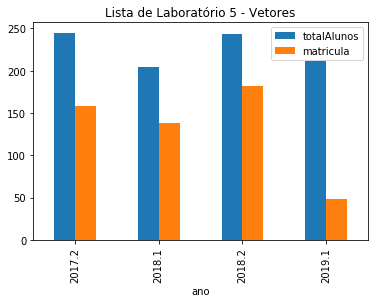

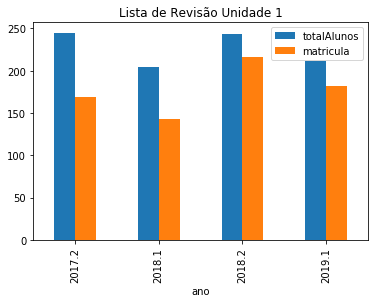

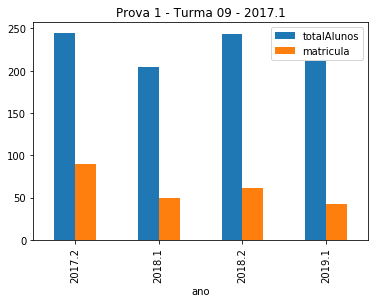

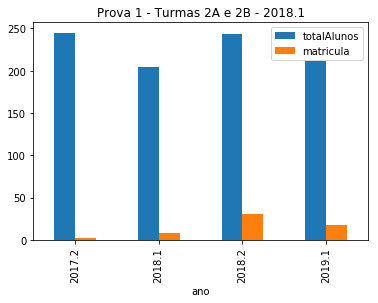

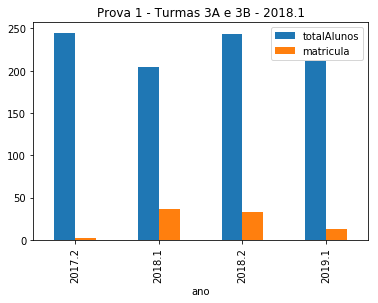

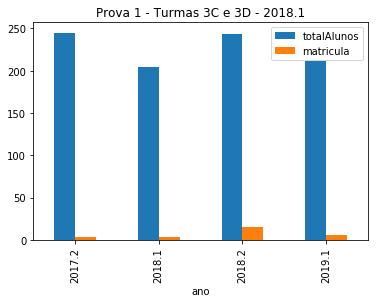

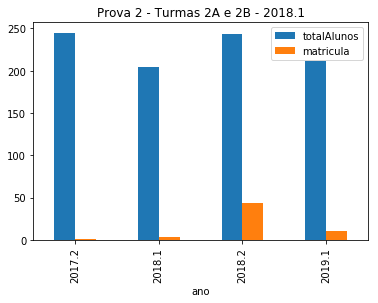

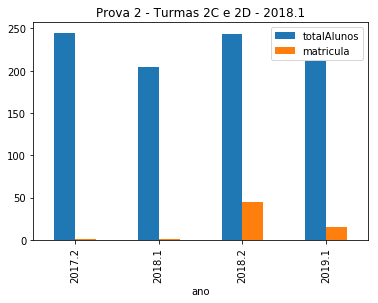

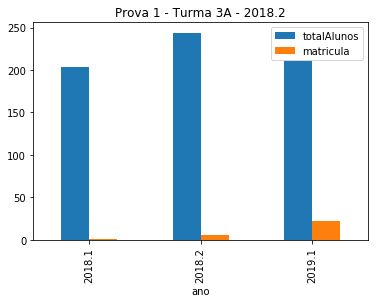

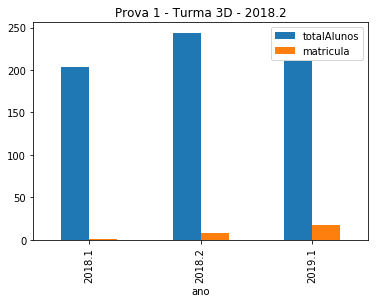

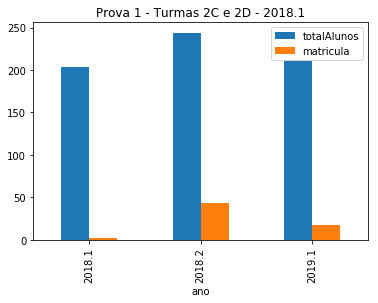

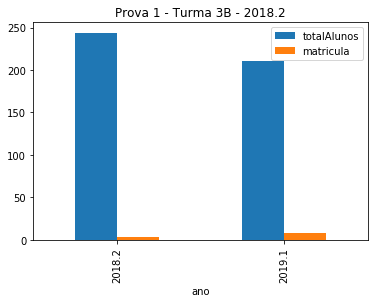

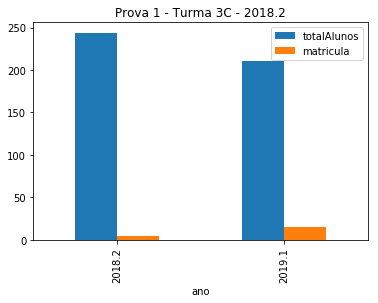

In [0]:
#Contar quantos alunos submeteram cada lista ao longo do tempo
quanLista = lopNotasLista.groupby(['titulo','ano']).count()
quanLista = quanLista.reset_index()
#print(quanLista.head())

#contar quantos alunos estão cadastrados ao longo do tempo
c = lopNotasLista.groupby('ano')["idAluno"].unique()
c = c.reset_index()
alunoAno ={}
dtAlunoAno = pd.DataFrame()
for i in c["ano"].unique():
  q = c.loc[c["ano"] == i ,"idAluno"]
  alunoAno[i] = len(q.iloc[0])
dtAlunoAno["ano"] = alunoAno.keys()
dtAlunoAno["totalAlunos"] = alunoAno.values()
#print(dtAlunoAno)

quanListAluno = pd.merge(dtAlunoAno,quanLista,on=['ano'], how="outer")
quanListAluno = quanListAluno.reset_index()
quanListAluno = quanListAluno[["titulo", "ano", "totalAlunos", "matricula"]]

# Creating graphics with Seaborn
#gQuandLista = sns.FacetGrid(quanListAluno, col = "titulo", col_wrap =2, height=3, aspect=2, sharex=False)
#bp=gQuandLista.map(sns.barplot,"ano","idAluno" ,palette=sns.color_palette(['red','green']))

#bp.add_legend()
#bp.set_titles("{col_name}")
#bp.set_ylabels("quantidade")
#bp.set_xlabels("ano")
#plt.show()
quanListAluno.set_index("ano", inplace=True)
atividades = list(quanListAluno.titulo.unique())

for atividade in atividades:
    quanListAluno[quanListAluno.titulo == atividade].sort_index().plot.bar(title=atividade)
    plt.show()


**Gráfico para mostrar as médias das notas das listas ao longo do tempo**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


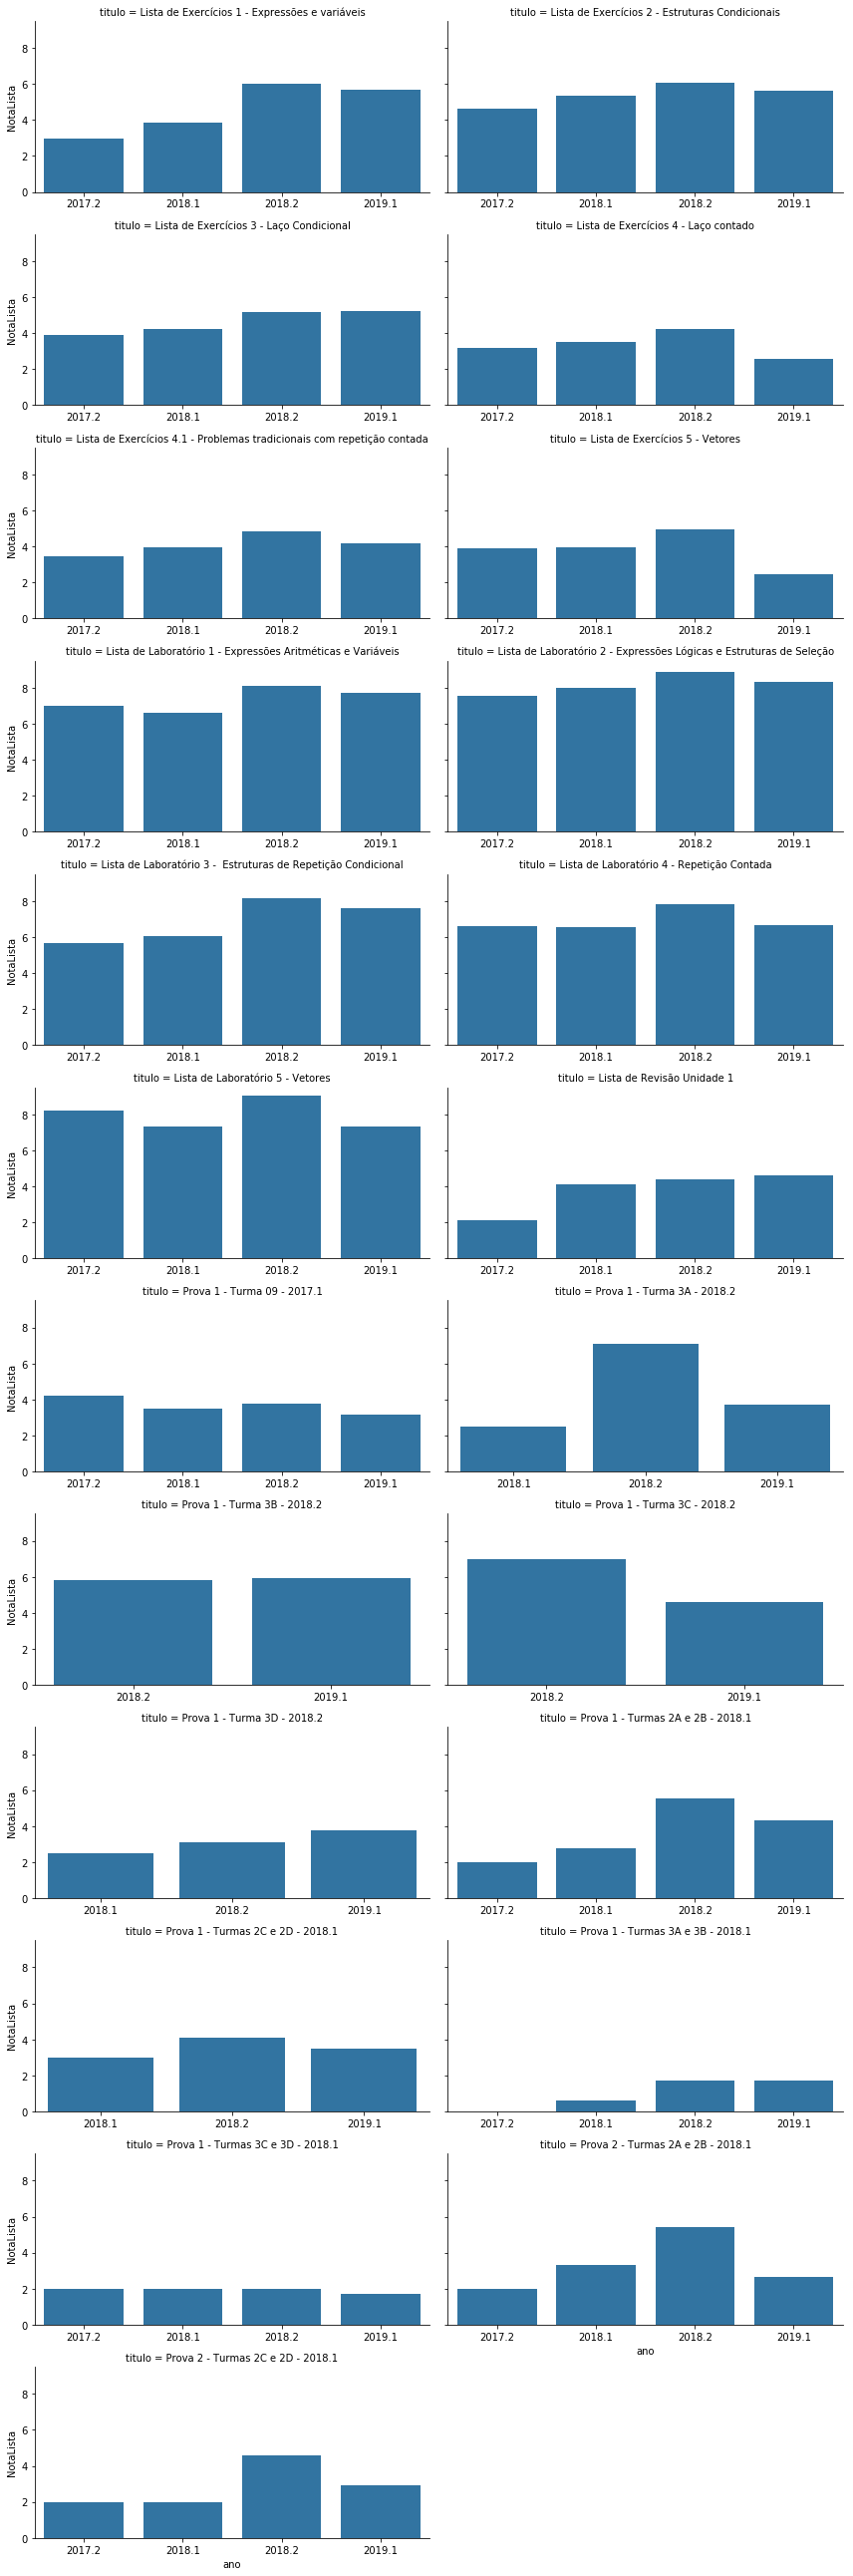

In [0]:
mediaNota = lopNotasLista.groupby(['titulo','ano'])["NotaLista"].mean()
mediaNota = mediaNota.reset_index()
#print(mediaNota[["titulo",'NotaLista',"ano"]])

# Creating graphics with Seaborn
gMediaNota = sns.FacetGrid(mediaNota, col = "titulo", col_wrap=2, height=3, aspect=2, sharex=False)
gMediaNota.map(sns.barplot,"ano", "NotaLista")
plt.show()

In [0]:
lopNotasLista.columns

**Correlação entre a media de questoes questoes feitas com a nota da prova por lista**

In [0]:
#ax2 = lopNotasLista.plot.scatter(x='NotaLista', y='NotaLista', c='DarkBlue')

quanLista = lopNotasLista.groupby(['titulo']).sum()
quanLista = quanLista.reset_index()
#print(quanLista.head())      
# Creating graphics with Seaborn
gQuandLista = sns.FacetGrid(quanLista, col = "titulo", col_wrap =2, height=3, aspect=2, sharex=False)
bp=gQuandLista.map(sns.scatterplot,"NotaLista","questoesFeitas" ,palette=sns.color_palette(['red','green']))

bp.add_legend()
bp.set_titles("{col_name}")
bp.set_ylabels("Media Questoes Feitas")
bp.set_xlabels("Media de Nota")
plt.show()